# 
<font face="华文行楷" size=10 >分形——几何维数 (Fractal-Geometric dimension)</font> 
## [>](https://github.com/HUSKYzjh/ke_xue_bian_cheng)`翟家辉 19720212203881`

---------------------
________________________
<font size=6><div align='center'> **------------------------目录------------------------**</div></font>


## &#x2705; 壹 · 分形介绍
 
## &#x2705; 贰 · 科赫曲线演示

## &#x2705; 叁 · 随机行走的计盒维数

## &#x2705; 肆 · 单位圆的计盒维数

## &#x2705; 伍 · 结语



In [170]:
#常用库及命令

import numpy as np
    # 矩阵运算库
import matplotlib.pyplot as plt
    # 绘图
import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
import random
    # 生成随机数
import scipy as sc
    # 形式运算求解析解
from scipy.optimize import curve_fit
    # 函数拟合
from scipy.fftpack import fft
    # 快速FFT变换
%matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号

In [150]:
def RC():# Random Color
    STR="#"
    for i in range(6):
        STR=STR+random.choice("0123456789ABCDEF")
    return STR

# Zplt 定义见附录


In [197]:
# Zplt 自定义绘图函数，参数见附录
def Zplt(X,Y,Z=0,Box=0,Size=[9,9],Dim=2,Bm=0,Type="P",La="-",Lx="X",Ly="Y",Lz="Z",Tn="",Ls=15,Lw=1,Lm="-",Lc="black",Al=1,Ms=2,Mm="",Mc="black",AE=[30,-60],Re=[],**Other):

    if Bm == 0:# 正常情况，单图绘制
        if Size != True:
            plt.figure(figsize=Size)
            plt.title(Tn,size=Ls)
            plt.xlabel(Lx,size=Ls)
            plt.ylabel(Ly,size=Ls)
        if Dim == 2:# 二维图
            
            
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    plt.plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    plt.plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                plt.scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=plt.hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            plt.legend(loc="best")
            
        elif Dim == 3: 
            plt.view_init(elev=AE[0],azim=AE[1])
            
            if Size != True:
                plt.axes(projection='3d')
                plt.xlabel(Lx,size=Ls)
                plt.ylabel(Ly,size=Ls)
                plt.zlabel(Lz,size=Ls)
                
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    plt.plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    plt.plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                plt.scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=plt.hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            plt.legend(loc="best")            
        
    elif Bm == 1:# 分格控制
        plt.figure(figsize=Size)
        global gs
        gs = gridspec.GridSpec(Box[0],Box[1])
        plt.suptitle(Tn,size=Ls)       
        
    else:# 图中图
        Bm[4]=eval(f"plt.subplot(gs[{Bm[0]}:{Bm[1]},{Bm[2]}:{Bm[3]}])")
        
        if Dim == 2:# 二维图
            Bm[4].xlabel(Lx,size=Ls)
            Bm[4].ylabel(Ly,size=Ls)
            
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    Bm[4].plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    Bm[4].plot(X,Y,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                Bm[4].scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=Bm[4].hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            Bm[4].legend(loc="best")
            
        elif Dim == 3: 
            
            if Size != True:
                Bm[4].axes(projection='3d')
                Bm[4].xlabel(Lx,size=Ls)
                Bm[4].ylabel(Ly,size=Ls)
                Bm[4].zlabel(Lz,size=Ls)
                
            if Type == "P":# plot
                
                if Mm == "":# 无标志点
                    Bm[4].plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,label=La)
                
                else:# 有标志点
                    Bm[4].plot(X,Y,Z,color=Lc,linewidth=Lw,alpha=Al,marker=Mm,markersize=Ms,markerfacecolor=Mc,label=La)
                
            elif Type == "S": # scatter
                Bm[4].scatter(X,Y,s=Ms,c=Mc,marker=Mm,alpha=Al,label=La)
                
            elif Type == "H":# hist
                n,bins,patches=Bm[4].hist(X,Y,ec=Lc,fc=Mc,density=Lm,alpha=Al,label=La)
                
            Bm[4].legend(loc="best")
            
    if len(Other) != 0:# 额外命令
        for i in range(1,len(Other)+1):
            eval(Other[f'o{i}'])
            
    #返回值
    if Re == 'H':
        return [n,bins,patches]# 频率或频数分布
    
    elif Re == 0:
        Zplt="HUSKY"
        print("QAQ,代码码不动了")
        
    elif Re != []:
        R=eval(Re)
        return R
        

---------
--------
# 一 · 分形介绍

# > *`分形几何学`*

<font size=3.5>**[分形几何学](https://baike.baidu.com/item/%E5%88%86%E5%BD%A2%E5%87%A0%E4%BD%95?fromModule=lemma_inlink)** 是一门以不规则几何形态为研究对象的几何学。相对于传统几何学的研究对象为整数维数，如，零维的点、一维的线、二维的面、三维的立体乃至四维的时空。分形几何学的研究对象为 *非负实数维数* ，如0.63、1.58、2.72、log2/log3（参见康托尔集）。因为它的研究对象普遍存在于自然界中，因此分形几何学又被称为“大自然的几何学”。</font>

# > *`计盒维数`*

<font size=3.5>在分形几何中, **[计盒维数](https://baike.baidu.com/item/%E8%AE%A1%E7%9B%92%E7%BB%B4%E6%95%B0/22781986)**也称为 *盒维数* 、*闵可夫斯基维数*，是一种测量距离空间(X,d)（特别是豪斯多夫空间）比如欧氏空间R中分形维数的计算方法。要计算分形S的维数，你可以想象一下把这个分形放在一个均匀分割的网格上，数一数最小需要几个格子来覆盖这个分形。通过对网格的逐步精化，查看所需覆盖数目的变化，从而计算出计盒维数。
    
<font size=3.5>假设当格子的边长是$r$时，总共把空间分成N个格子，那么计盒维数就是：$$ D = \lim_{n \to 0} \frac{\text{log}(N_{r})}{\text{log}(1/r)} \tag{3}$$

<font size=3.5>当极限不收敛时，我们必须指出 *顶盒维数* 或 *底盒维数* ，或者说，计盒维数仅在和顶盒维数与底盒维数相等时才是有定义的。顶盒维数也称为能量维数、科莫格洛夫维数、科莫格洛夫容积，或者闵可夫斯基上界维数，类似的可定义闵可夫斯基下界维数。</font>

---------
--------
# 二 · 科赫曲线演示

In [4]:
#KochDrawV1.py
import turtle
turtle.TurtleScreen._RUNNING = True

def koch(size, n):
    if n == 0:
        turtle.fd(size)
    else:
        for angle in [0,60 , -120, 60]:
            turtle.right(angle)
            koch(size/3, n-1)
def main():
    turtle.setup(1000,400)
    turtle.penup()
    turtle.goto(-500, 100)
    turtle.pendown()
    turtle.speed(0)
    turtle.delay(0)
    turtle.pensize(2)
    koch(1000,5)     # 0阶科赫曲线长度，阶数

    turtle.hideturtle()
    turtle.mainloop()
main()


># 示例
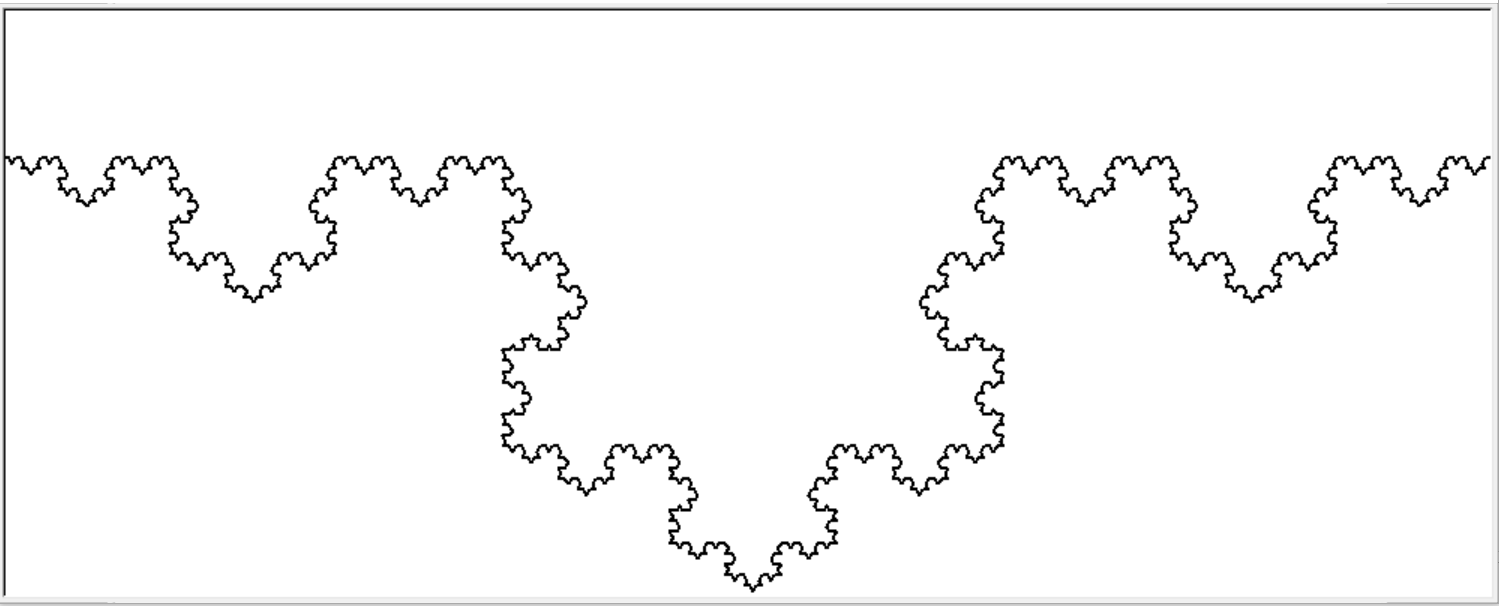

---------
--------
# 三 · 随机行走的计盒维数

# > *`函数构建`*

In [95]:
def BOX(box_N): # MOST 100,000 得二维矩阵
    box_B=np.zeros((box_N+1,box_N+1),dtype=np.bool_)
    return box_B


In [96]:
def RW1(random_R,step_N):  # 得轨迹点数据
    x0=np.linspace(0,1,step_N)
    y0=np.zeros((2,step_N))
    for i in range(step_N-1):
        y0[0][i+1]=y0[0][i]+random.choice([-1,1])*random.uniform(-random_R,random_R)
    XY0=np.vstack([x0, y0])
    Y_max=np.max(XY0[1])
    Y_min=np.min(XY0[1])
    Y=Y_max-Y_min
    XY0[1]=(XY0[1]-Y_min)/Y
    return XY0

In [101]:
def N_r(random_R,step_N,box_N):# 得保留格数
    Source=RW1(random_R,step_N)
    BOX_k=BOX(box_N)
    
# 确定格数
    B_s=1/box_N
    Bx=np.divide(Source[0],B_s)
    Bx=np.ceil(Bx)
    By=np.divide(Source[1],B_s)
    By=np.ceil(By)

# 格内标识
    num=0
    for i in range(step_N):
        if BOX_k[int(Bx[i])-1][int(By[i])-1]==False:
            BOX_k[int(Bx[i])-1][int(By[i])-1] = True
            num=num+1
    
    return num


In [191]:
def func(x,k,b):
    return(k*x+b)

# > *`分格展示`*

In [175]:

def N_r_show(random_R,step_N,box_N):# 点阵图
    Pblack=RW1(random_R,step_N)
    Zplt(Pblack[0],Pblack[1],La="随机行走",Al=0.6)
    BOX_k=BOX(box_N)
    
# 确定格数
    B_s=1/box_N
    Bx=np.divide(Pblack[0],B_s)
    Bx=np.ceil(Bx)
    By=np.divide(Pblack[1],B_s)
    By=np.ceil(By)
    px=[]
    py=[]

# 格内标识
    
    for i in range(step_N):
        if BOX_k[int(Bx[i])-1][int(By[i])-1]==False:
            BOX_k[int(Bx[i])-1][int(By[i])-1] = True
            px.append((Bx[i]-0.5)/box_N)
            py.append((By[i]-0.5)/box_N)
#     print(px,py)       
    Zplt(px,py,Type="S",Ms=1000/box_N,Mm="s",Mc="r",Al=0.4,Size=True,La="分格")
    
    
widgets.interact(
    N_r_show,
    box_N=widgets.IntSlider(min=100, max=8000, step=100, value=100,description='N(分格数):'),
    step_N=widgets.IntSlider(min=10000, max=100000, step=100, value=30000,description='M(行走次数):'),
    random_R=widgets.FloatSlider(min=0, max=10, step=0.000001, value=1,description='随机步长:'),
    计盒维数=False,
    LOG=False
)

interactive(children=(FloatSlider(value=1.0, description='随机步长:', max=10.0, step=1e-06), IntSlider(value=30000…

<function __main__.N_r_show(random_R, step_N, box_N)>

# > *`维数计算`*

In [207]:
def main_1(toN,R_N,R_r,计盒维数,LOG):
    x=[]
    y=[]
    if 计盒维数 is True:
        for i in range(10,toN+1,int(toN/100)):
            y.append(np.log(N_r(R_r,R_N,i))/np.log(i))
            x.append(i)
        Zplt(x,y,Size=(9,5),Mm="o",Mc="r",Ms=5,La="计盒维数",Tn="计盒维数随盒数目变化",Lx='边等分数：N',Ly="计盒维数：D")
    elif 计盒维数 is False:
        for i in range(10,toN+1,int(toN/100)):
            y.append(np.log(N_r(R_r,R_N,i)))
            x.append(np.log(i))
        Zplt(x,y,Size=(9,5),Mm="o",Mc="r",Ms=5,La="计盒维数",Tn="计盒维数随盒边长变化",Lx='$ln(1/r)$',Ly="$ln{N_r}$")  
    if LOG is True:
        plt.xscale("log")
        plt.yscale("log")
        
    if 计盒维数 is False:
        popt, pcov = curve_fit(func,x,y)
        x0=np.linspace(min(x),max(x),100)
        Zplt(x0,func(x0,popt[0],popt[1]),La=f"拟合曲线,D={int(popt[0]*10000)/10000}",Lc="b",Size=True)  
    
widgets.interact_manual(
    main_1,
    toN=widgets.IntSlider(min=100, max=20000, step=100, value=1000,description='N(分格数):'),
    R_N=widgets.IntSlider(min=10000, max=100000, step=100, value=10000,description='M(行走次数):'),
    R_r=widgets.FloatSlider(min=0, max=10, step=0.000001, value=1,description='随机步长:'),
    计盒维数=False,
    LOG=False
)

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=20000, min=100, step=100), IntSlider(va…

<function __main__.main_1(toN, R_N, R_r, 计盒维数, LOG)>

># 例图
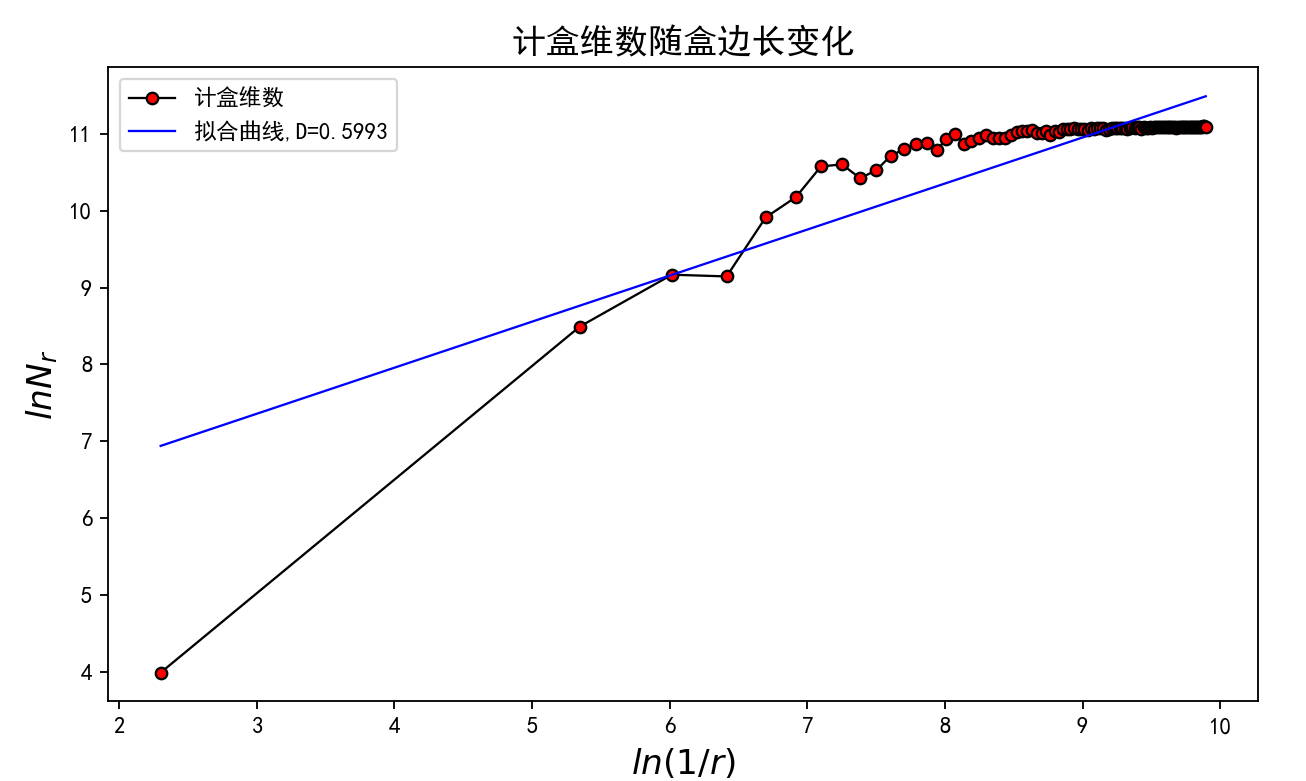

---------
--------
# 四 · 单位圆的计盒维数

# > *`函数构建`*

In [146]:
def C_1(step_N):
    x0=np.linspace(-0.5,0.5,step_N)
    x0=np.hstack([x0,x0[::-1]])
    y0=np.zeros((2,2*step_N))
    for i in range(step_N-1):
        y0[0][i+1]=np.sqrt(0.25-x0[i+1]**2)
        y0[0][-2-i]=-np.sqrt(0.25-x0[i+1]**2)
    XY0=np.vstack([x0+0.5,y0+0.5])
    return XY0
# > *`函数构建`*

In [201]:
def N_c(step_N,box_N):
    Source=C_1(step_N)
    BOX_k=BOX(box_N)
    
# 确定格数
    B_s=1/box_N
    Bx=np.divide(Source[0],B_s)
    Bx=np.ceil(Bx)
    By=np.divide(Source[1],B_s)
    By=np.ceil(By)

# 格内标识
    num=0
    for i in range(step_N):
        if BOX_k[int(Bx[i])-1][int(By[i])-1]==False:
            BOX_k[int(Bx[i])-1][int(By[i])-1] = True
            num=num+1
    
    return num


In [202]:
def func(x,k,b):
    return(k*x+b)

# > *`分格展示`*

In [203]:

def N_c_show(step_N,box_N):# 点阵图
    Pblack=C_1(step_N)
    Zplt(Pblack[0],Pblack[1],La="单位圆",Al=0.6)
    BOX_k=BOX(box_N)
    
# 确定格数
    B_s=1/box_N
    Bx=np.divide(Pblack[0],B_s)
    Bx=np.ceil(Bx)
    By=np.divide(Pblack[1],B_s)
    By=np.ceil(By)
    px=[]
    py=[]

# 格内标识
    
    for i in range(2*step_N):
        if BOX_k[int(Bx[i])-1][int(By[i])-1]==False:
            BOX_k[int(Bx[i])-1][int(By[i])-1] = True
            px.append((Bx[i]-0.5)/box_N)
            py.append((By[i]-0.5)/box_N)
       
    Zplt(px,py,Type="S",Ms=1000/box_N,Mm="s",Mc="r",Al=0.4,Size=True,La="分格")
    
widgets.interact(
    N_c_show,
    box_N=widgets.IntSlider(min=100, max=8000, step=100, value=100,description='N(分格数):'),
    step_N=widgets.IntSlider(min=10000, max=100000, step=100, value=30000,description='M(绘图点数):'),
    计盒维数=False,
    LOG=False
)

interactive(children=(IntSlider(value=30000, description='M(绘图点数):', max=100000, min=10000, step=100), IntSlid…

<function __main__.N_c_show(step_N, box_N)>

# > *`维数计算`*

In [206]:
def main_2(toN,R_N,R_r,计盒维数,LOG):
    x=[]
    y=[]
    if 计盒维数 is True:
        for i in range(10,toN+1,int(toN/100)):
            y.append(np.log(N_c(R_N,i))/np.log(i))
            x.append(i)
        Zplt(x,y,Mm="o",Mc="r",Ms=5,La="计盒维数",Tn="单位圆计盒维数随盒边长变化",Lx='边等分数：N',Ly="计盒维数：D")
    elif 计盒维数 is False:
        for i in range(10,toN+1,int(toN/100)):
            y.append(np.log(N_c(R_N,i)))
            x.append(np.log(i))
        Zplt(x,y,Mm="o",Mc="r",Ms=5,La="计盒维数",Tn="单位圆计盒维数随盒边长变化",Lx='$ln(1/r)$',Ly="$ln{N_r}$")  
    if LOG is True:
        plt.xscale("log")
        plt.yscale("log")
        
    if 计盒维数 is False:
        popt, pcov = curve_fit(func,x,y)
        x0=np.linspace(min(x),max(x),100)
        Zplt(x0,func(x0,popt[0],popt[1]),La=f"拟合曲线,D={int(popt[0]*10000)/10000}",Lc="b",Size=True) 
    
widgets.interact_manual(
    main_2,
    toN=widgets.IntSlider(min=100, max=20000, step=100, value=1000,description='N(分格数):'),
    R_N=widgets.IntSlider(min=10000, max=100000, step=100, value=10000,description='M(行走次数):'),
    R_r=widgets.FloatSlider(min=0, max=10, step=0.000001, value=1,description='随机步长:'),
    计盒维数=False,
    LOG=False
)

interactive(children=(IntSlider(value=1000, description='N(分格数):', max=20000, min=100, step=100), IntSlider(va…

<function __main__.main_2(toN, R_N, R_r, 计盒维数, LOG)>

># 例图
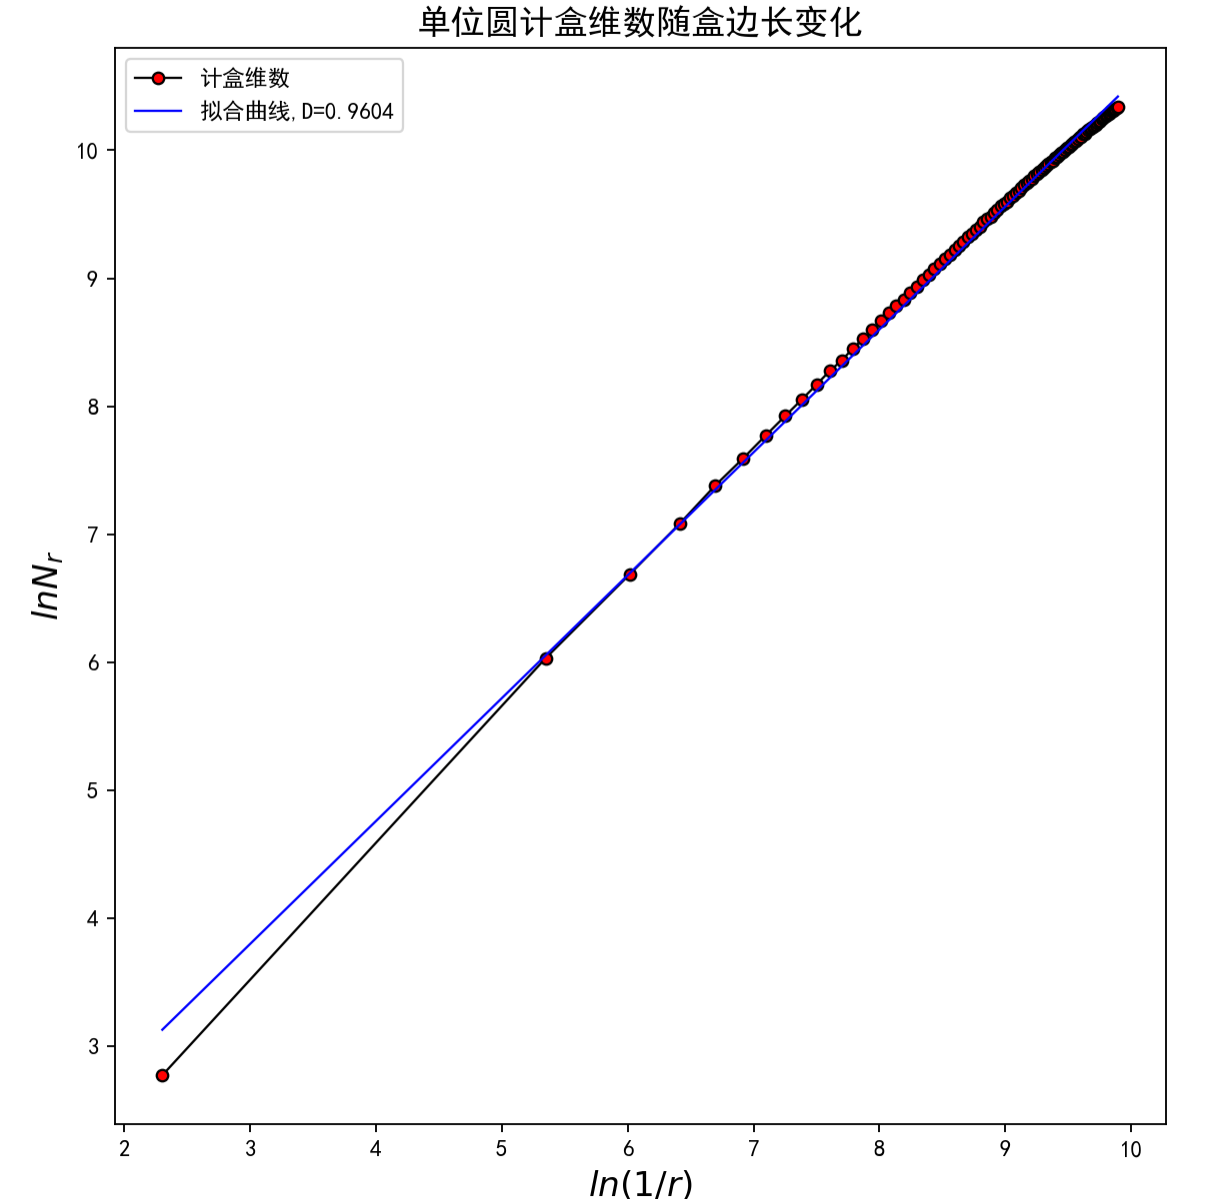

---------
--------
# 五 · 致谢 

## 特别鸣谢&#x1F339;&#x1F339;&#x1F339;：与吴本畅，翁凯枫的讨论。吴本畅同学对维数计算方法的扩展，变二维矩阵为一维数组，极大提高可分格数。

>## 另：已将各次作业上传至[GitHub](https://github.com/HUSKYzjh/ke_xue_bian_cheng)，其实已经拖了好几次o(TヘTo)